In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE



Using TensorFlow backend.


In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/BorialisSiS2Train.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 137779
number of validation images:	 15309
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


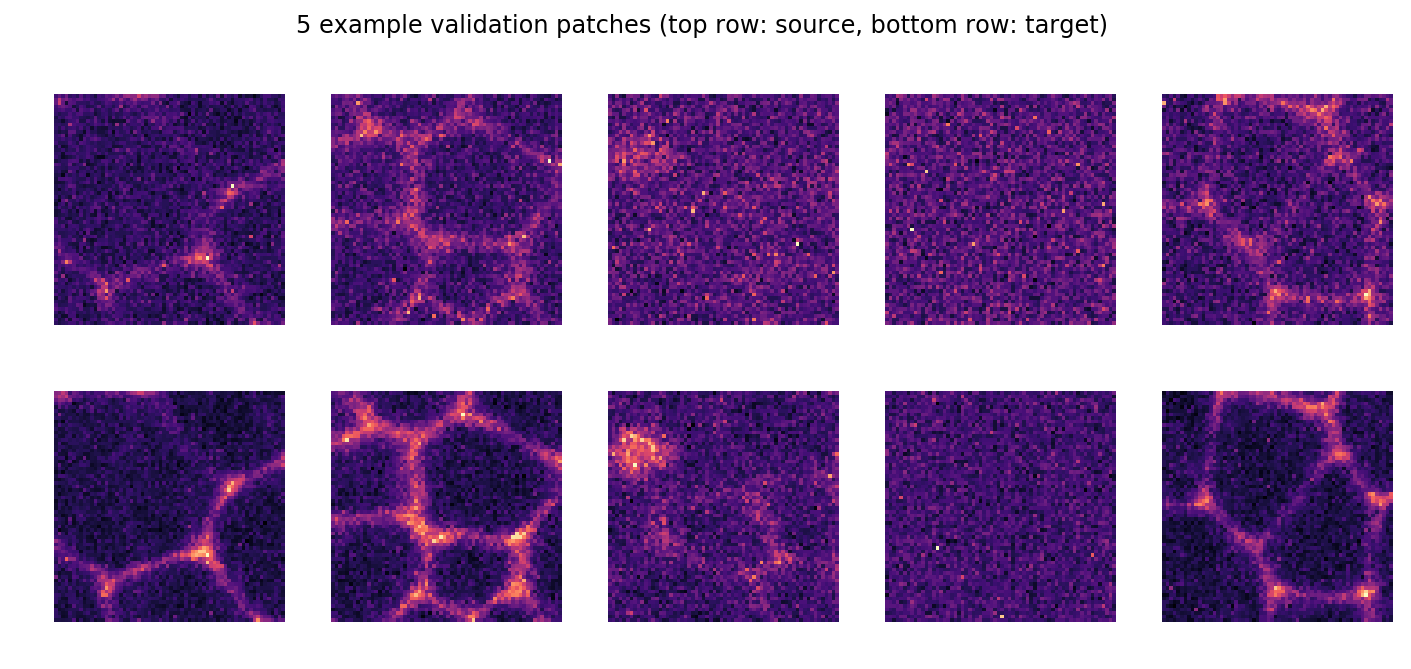

In [3]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [4]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=100, unet_n_depth=4,train_epochs= 100, train_batch_size = 16)
print(config)
vars(config)

Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=16, train_checkpoint='weights_best.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 10}, train_steps_per_epoch=100, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=4, unet_n_first=32, unet_residual=True)


{'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 3,
 'probabilistic': False,
 'train_batch_size': 16,
 'train_checkpoint': 'weights_best.h5',
 'train_epochs': 100,
 'train_learning_rate': 0.0004,
 'train_loss': 'mae',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'train_steps_per_epoch': 100,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, None, 1),
 'unet_kern_size': 3,
 'unet_last_activation': 'linear',
 'unet_n_depth': 4,
 'unet_n_first': 32,
 'unet_residual': True}

In [5]:
model = CARE(config, 'BorialisS1S2FlorisMidNoiseModel', basedir='/data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels')

In [6]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/100
100/100 [==============================] - 750s 7s/step - loss: 0.0854 - mse: 0.0131 - mae: 0.0854 - val_loss: 0.0749 - val_mse: 0.0096 - val_mae: 0.0749
Epoch 2/100
100/100 [==============================] - 743s 7s/step - loss: 0.0727 - mse: 0.0092 - mae: 0.0727 - val_loss: 0.0716 - val_mse: 0.0089 - val_mae: 0.0716
Epoch 3/100
100/100 [==============================] - 743s 7s/step - loss: 0.0710 - mse: 0.0087 - mae: 0.0710 - val_loss: 0.0704 - val_mse: 0.0085 - val_mae: 0.0704
Epoch 4/100
100/100 [==============================] - 743s 7s/step - loss: 0.0702 - mse: 0.0085 - mae: 0.0702 - val_loss: 0.0700 - val_mse: 0.0084 - val_mae: 0.0700
Epoch 5/100
100/100 [==============================] - 743s 7s/step - loss: 0.0706 - mse: 0.0086 - mae: 0.0706 - val_loss: 0.0695 - val_mse: 0.0083 - val_mae: 0.0695
Epoch 6/100
100/100 [==============================] - 742s 7s/step - loss: 0.0701 - mse: 0.0085 - mae: 0.0701 - val_loss: 0.0693 - val_mse: 0.0083 - val_mae: 0.0693
Epoc

100/100 [==============================] - 742s 7s/step - loss: 0.0683 - mse: 0.0081 - mae: 0.0683 - val_loss: 0.0681 - val_mse: 0.0080 - val_mae: 0.0681
Epoch 97/100
100/100 [==============================] - 742s 7s/step - loss: 0.0679 - mse: 0.0080 - mae: 0.0679 - val_loss: 0.0681 - val_mse: 0.0080 - val_mae: 0.0681
Epoch 98/100
100/100 [==============================] - 742s 7s/step - loss: 0.0676 - mse: 0.0079 - mae: 0.0676 - val_loss: 0.0681 - val_mse: 0.0080 - val_mae: 0.0681
Epoch 99/100
100/100 [==============================] - 741s 7s/step - loss: 0.0680 - mse: 0.0080 - mae: 0.0680 - val_loss: 0.0681 - val_mse: 0.0080 - val_mae: 0.0681
Epoch 100/100
100/100 [==============================] - 742s 7s/step - loss: 0.0683 - mse: 0.0081 - mae: 0.0683 - val_loss: 0.0682 - val_mse: 0.0080 - val_mae: 0.0682


['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


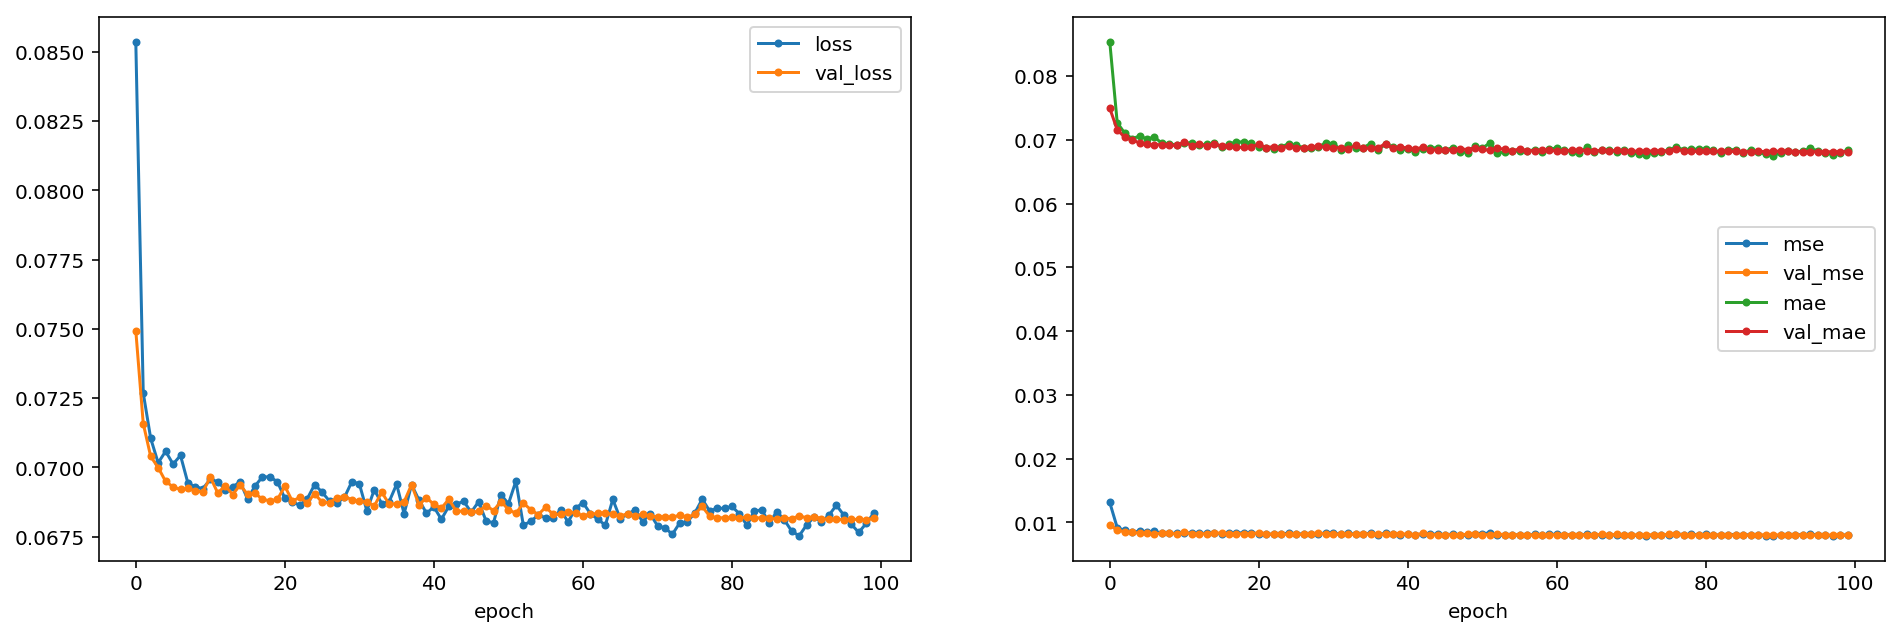

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

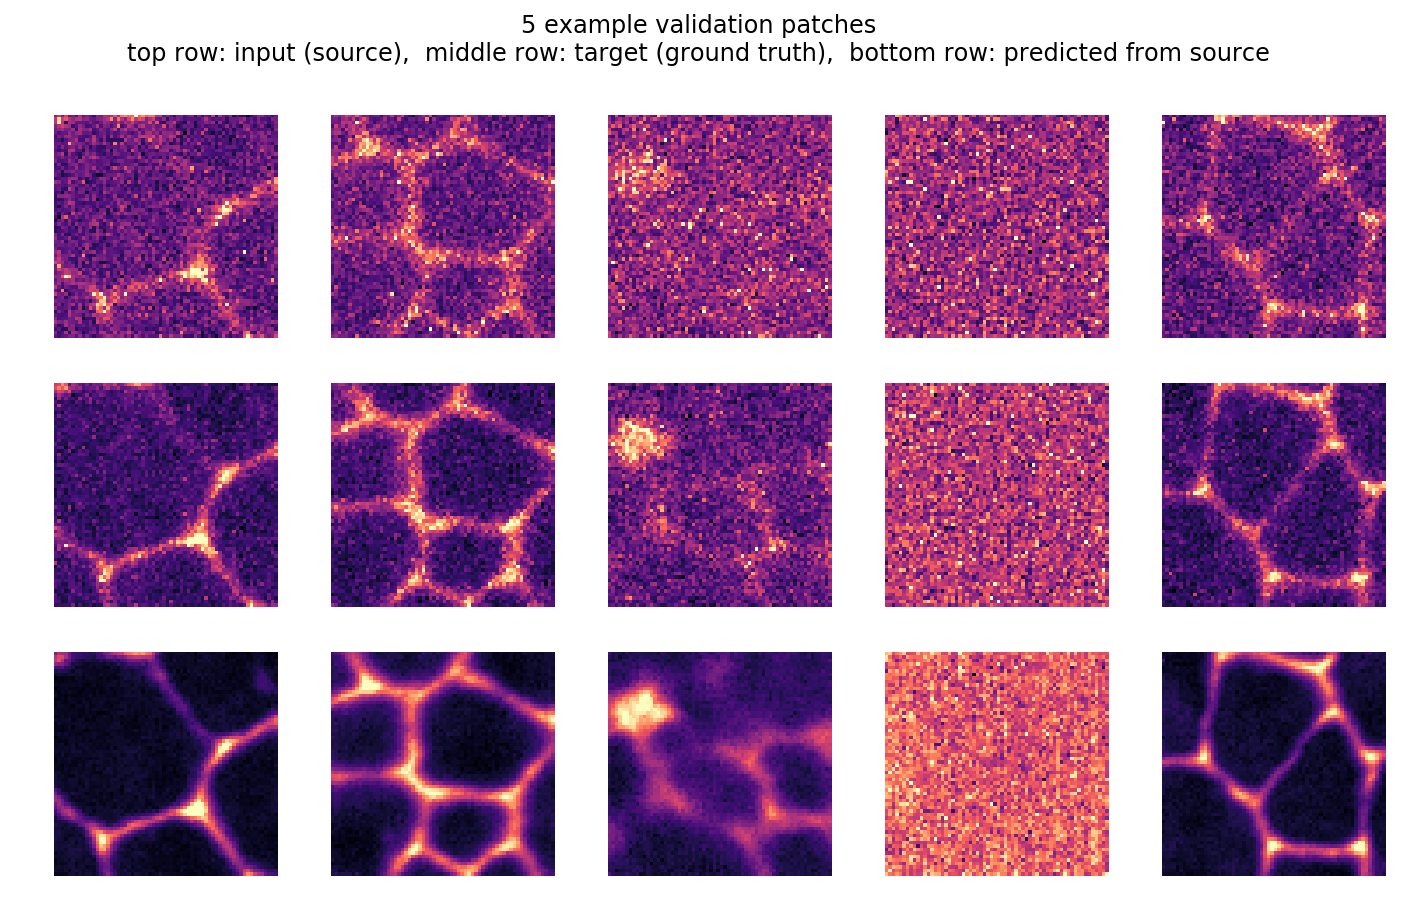

In [8]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

In [9]:
model.export_TF()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmp5qtmoun5/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels/BorialisS1S2FlorisMidNoiseModel/TF_SavedModel.zip
